## Import required library

In [1]:
import nltk
nltk.download('punkt')
import pandas as pd
import spacy
import nltk
import string
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Data preprocessing

In [2]:
import pandas as pd
top_df = pd.read_csv('Low_Artists.csv')
top_df.head()

,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,$copie,$O$,https://open.spotify.com/album/7Ja0MmZhnVdFjs5...,2010,4606632,"Ho$h, kykie kinders!\nOns gaan mos nou lekker ...",https://open.spotify.com/track/2rTjC1PYwenrBbA...,192,DieAntwoord
1,2•GOLDEN DAWN•7,2•GOLDEN DAWN•7,https://open.spotify.com/album/3kOlbclgj0Gglpz...,2018,6421323,"I've seen it all\nFace carved out of stone, un...",https://open.spotify.com/track/24JZqWlglnEfqYU...,289,DieAntwoord
2,Age Of Illusion,Age Of Illusion,https://open.spotify.com/album/56zia7byXUEiTcm...,2022,5273751,It's the Age of Illusion\nThe Age of Illusion\...,https://open.spotify.com/track/5jjH6vi22zsOAV2...,261,DieAntwoord
3,Alien,Mount Ninji And Da Nice Time Kid,https://open.spotify.com/album/4FrKhXf6FmfUjTy...,2016,17927575,I am a alien\n♪\nNo matter how hard I try I do...,https://open.spotify.com/track/2P8wndZLW1QnByi...,256,DieAntwoord
4,Baby's On Fire,Ten$ion,https://open.spotify.com/album/3FJydX4zwGGNIwl...,2012,144680835,Baby's on fire!\nBoom!\nBoom-boom!\nShowtime! ...,https://open.spotify.com/track/6mlGXuG5FmzcePH...,236,DieAntwoord


In [3]:
# Load the English model from spaCy
nlp = spacy.load("en_core_web_sm")

# Create a set of English stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    doc = nlp(text.lower())
    tokens = [
        token.lemma_ for token in doc
        if token.is_alpha and token.text not in stop_words
    ]
    return " ".join(tokens)

In [5]:
Top_lyrics = top_df.copy()

In [6]:
Top_lyrics['Lyrics'] = top_df['Lyrics'].apply(preprocess_text)
Top_lyrics.head() 

,SongName,AlbumName,AlbumLink,Year,PlayCount,Lyrics,SongLink,Duration,artist
0,$copie,$O$,https://open.spotify.com/album/7Ja0MmZhnVdFjs5...,2010,4606632,kykie kinder ons gaan mos nou lekker naai nè g...,https://open.spotify.com/track/2rTjC1PYwenrBbA...,192,DieAntwoord
1,2•GOLDEN DAWN•7,2•GOLDEN DAWN•7,https://open.spotify.com/album/3kOlbclgj0Gglpz...,2018,6421323,see face carve stone unreadable pretty wise ug...,https://open.spotify.com/track/24JZqWlglnEfqYU...,289,DieAntwoord
2,Age Of Illusion,Age Of Illusion,https://open.spotify.com/album/56zia7byXUEiTcm...,2022,5273751,age illusion age illusion everyone beautiful e...,https://open.spotify.com/track/5jjH6vi22zsOAV2...,261,DieAntwoord
3,Alien,Mount Ninji And Da Nice Time Kid,https://open.spotify.com/album/4FrKhXf6FmfUjTy...,2016,17927575,alien matter hard try fit always sad lonely wa...,https://open.spotify.com/track/2P8wndZLW1QnByi...,256,DieAntwoord
4,Baby's On Fire,Ten$ion,https://open.spotify.com/album/3FJydX4zwGGNIwl...,2012,144680835,baby fire boom boom boom showtime motherfucker...,https://open.spotify.com/track/6mlGXuG5FmzcePH...,236,DieAntwoord


In [7]:
Top_lyrics = pd.DataFrame(Top_lyrics['Lyrics'])
Top_lyrics.head()

,Lyrics
0,kykie kinder ons gaan mos nou lekker naai nè g...
1,see face carve stone unreadable pretty wise ug...
2,age illusion age illusion everyone beautiful e...
3,alien matter hard try fit always sad lonely wa...
4,baby fire boom boom boom showtime motherfucker...


In [17]:
lyric_fillers = [
    "oh", "ooh", "ooo", "ah", "aah", "mm", "mmm", "mmh",
    "eh", "hey", "ha", "la", "da", "nah", "yeah", "yea","bitch", "shit", "fuck", "nigga", "na", "niggas", "whoa",
    "woah", "ya" , "hol", "whoo", "gon",
    "pop" , "know" , "say" , "man",
    "di", "huh", "uh" , "woo" ,"yah" ,"yo"
]

In [18]:
def clean_text_lda(text):
    text = text.lower()
    text = re.sub(r"[^\x00-\x7F]", " ", text)  # Remove ASCII outside
    text = re.sub(r"[^a-z\s]", " ", text)     # a–z
    text = re.sub(r"\s+", " ", text)          # Multiple spaces to single space
    pattern = r"\b(" + "|".join(lyric_fillers) + r")\b" # remove fillers
    text = re.sub(pattern, " ", text)
    return text.strip()

Top_lyrics["clean_lyrics"] = Top_lyrics["Lyrics"].apply(clean_text_lda)

### Double check

In [19]:
from collections import Counter

all_weird = []
for t in Top_lyrics["clean_lyrics"]:
    all_weird.extend(re.findall(r"[^a-zA-Z0-9\s]", t))

Counter(all_weird).most_common(20)

[]

### LDA

In [20]:
Top_lyrics.head()

,Lyrics,clean_lyrics,Top_LDA_Topic,LDA_Topic_Keywords
0,kykie kinder ons gaan mos nou lekker naai nè g...,kykie kinder ons gaan mos nou lekker naai n ge...,5,"like, come, want, girl, jou, boy, stop, daddy,..."
1,see face carve stone unreadable pretty wise ug...,see face carve stone unreadable pretty wise ug...,8,"let, baby, like, feel, wanna, street, shame, g..."
2,age illusion age illusion everyone beautiful e...,age illusion age illusion everyone beautiful e...,3,"wanna, baby, time, like, change, make, believe..."
3,alien matter hard try fit always sad lonely wa...,alien matter hard try fit always sad lonely wa...,0,"love, want, time, tell, feel, make, think, lik..."
4,baby fire boom boom boom showtime motherfucker...,baby fire boom boom boom showtime motherfucker...,5,"like, come, want, girl, jou, boy, stop, daddy,..."


In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Text to vector
vectorizer = CountVectorizer(stop_words="english")
doc_term_matrix = vectorizer.fit_transform(Top_lyrics["clean_lyrics"])
feature_names = vectorizer.get_feature_names_out()

#### Decide the number of topics

In [22]:
# LDA Model and Perplexity Calculation
for n_topics in range(2, 15):
    model = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    model.fit(doc_term_matrix)
    perplexity = model.perplexity(doc_term_matrix)
    print(f"Topics: {n_topics} → Perplexity: {perplexity:.2f}")

Topics: 2 → Perplexity: 1665.03
Topics: 3 → Perplexity: 1648.37
Topics: 4 → Perplexity: 1661.84
Topics: 5 → Perplexity: 1640.93
Topics: 6 → Perplexity: 1633.17
Topics: 7 → Perplexity: 1635.61
Topics: 8 → Perplexity: 1642.91
Topics: 9 → Perplexity: 1648.36
Topics: 10 → Perplexity: 1607.35
Topics: 11 → Perplexity: 1610.80
Topics: 12 → Perplexity: 1619.20
Topics: 13 → Perplexity: 1617.75
Topics: 14 → Perplexity: 1622.40


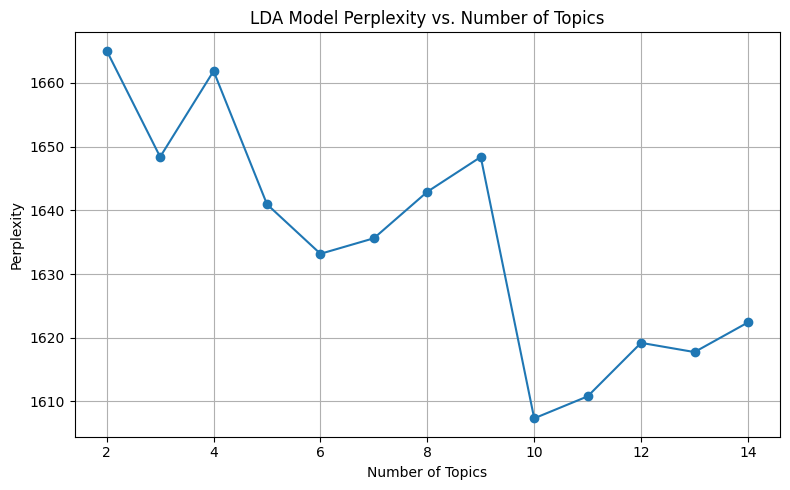

In [23]:
import matplotlib.pyplot as plt

perplexities = []
topic_range = range(2, 15)

for n_topics in topic_range:
    model = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    model.fit(doc_term_matrix)
    perplexity = model.perplexity(doc_term_matrix)
    perplexities.append(perplexity)

plt.figure(figsize=(8, 5))
plt.plot(topic_range, perplexities, marker='o')
plt.title("LDA Model Perplexity vs. Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Perplexity")
plt.grid(True)
plt.tight_layout()
plt.show()

Elbow + minium region ==> N=4

In [24]:
n_topics = 10  # Can be adjusted based on analysis
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda_model.fit(doc_term_matrix)

# Get the top keywords (top 7) for each topic
topic_words = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_features = [feature_names[i] for i in topic.argsort()[:-15:-1]]
    topic_words.append(", ".join(top_features))

# Assign the most probable topic and its representative keywords to each question
doc_topic_distrib = lda_model.transform(doc_term_matrix)  # ✅ Using doc_term_matrix here as well
Top_lyrics["Top_LDA_Topic"] = doc_topic_distrib.argmax(axis=1)
Top_lyrics["LDA_Topic_Keywords"] = Top_lyrics["Top_LDA_Topic"].apply(lambda x: topic_words[x])

Top_lyrics.head()

,Lyrics,clean_lyrics,Top_LDA_Topic,LDA_Topic_Keywords
0,kykie kinder ons gaan mos nou lekker naai nè g...,kykie kinder ons gaan mos nou lekker naai n ge...,2,"love, feel, like, want, tell, think, time, mak..."
1,see face carve stone unreadable pretty wise ug...,see face carve stone unreadable pretty wise ug...,0,"love, wanna, make, like, good, fall, want, sle..."
2,age illusion age illusion everyone beautiful e...,age illusion age illusion everyone beautiful e...,2,"love, feel, like, want, tell, think, time, mak..."
3,alien matter hard try fit always sad lonely wa...,alien matter hard try fit always sad lonely wa...,2,"love, feel, like, want, tell, think, time, mak..."
4,baby fire boom boom boom showtime motherfucker...,baby fire boom boom boom showtime motherfucker...,4,"baby, come, let, love, time, little, long, lie..."


In [25]:
Top_lyrics["LDA_Topic_Keywords"].value_counts()

LDA_Topic_Keywords
love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing         488
baby, come, let, love, time, little, long, lie, tell, like, way, home, night, girl           146
love, wanna, make, like, good, fall, want, sleep, way, wonder, home, time, baby, tell         92
like, make, fuckin, rap, ass, jou, die, right, hosh, fokken, maybe, carson, game, fake        76
like, need, make, boy, wanna, ninja, soul, hit, come, look, safe, think, maak, time           76
life, care, like, make, real, come, let, way, day, use, high, love, time, die                 60
like, let, away, hear, wild, wanna, white, make, free, ass, break, boy, baruch, want          56
like, way, look, beat, make, step, hit, feel, perfect, face, rat, good, girl, boy             55
come, like, river, crackin, nkqo, boy, rich, world, stop, run, death, line, change, thing     53
like, run, home, bang, hard, come, wanna, pocot, rhyme, cause, love, make, guru, brother      50
Name: count

### Transformer to generate topic

In [26]:
import torch
import torch.nn.functional as F
from transformers import (
    AutoTokenizer, AutoModelForSequenceClassification,
    GPT2LMHeadModel, GPT2Tokenizer,
    pipeline
)

In [27]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [28]:

# YOUR CODE HERE:
# 1. Load GPT-2 model and tokenizer
print("Loading GPT-2 tokenizer...")
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

model = GPT2LMHeadModel.from_pretrained('gpt2')
model = model.to(device)
model.eval()  # Set to evaluation mode

# 2. Create function to generate product descriptions
#    def generate_description(prompt, **generation_params):
#        # Your implementation
#        pass
def generate_text(prompt,
                  max_length=50,
                  temperature=1.0,
                  top_k=50,
                  top_p=0.95,
                  num_return_sequences=1):
    """
    Generate text using GPT-2.

    Args:
        prompt: Starting text
        max_length: Maximum length of generated text
        temperature: Randomness (higher = more random)
        top_k: Consider top k words
        top_p: Nucleus sampling threshold
        num_return_sequences: Number of generations to return

    Returns:
        List of generated texts
    """
    # Encode the prompt
    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)

    # Generate
    with torch.no_grad():
        output = model.generate(
            input_ids,
            max_length=max_length,
            temperature=temperature,
            top_k=top_k,
            top_p=top_p,
            num_return_sequences=num_return_sequences,
            do_sample=True,
            pad_token_id=tokenizer.eos_token_id
        )

    # Decode and return
    generated_texts = []
    for i in range(num_return_sequences):
        text = tokenizer.decode(output[i], skip_special_tokens=True)
        generated_texts.append(text)

    return generated_texts

print("✓ Generation function ready!")

# 3. Generate descriptions for 3 product categories
#    Try different parameters:
#    - temperature (0.7, 1.0)
#    - top_k (50, 100)
#    - top_p (0.9, 0.95)
#    - max_length (50, 100)

product_prompts = {
    "Topic1": "Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing.",
    "Topic2": "Write a topic of song based on these words: baby, come, let, love, time, little, long, lie, tell, like, way, home, night, girl.",
    "Topic3": "Write a topic of song based on these words: love, wanna, make, like, good, fall, want, sleep, way, wonder, home, time, baby, tell.",
    "Topic4": "Write a topic of song based on these words: like, make, fuckin, rap, ass, jou, die, right, hosh, fokken, maybe, carson, game, fake.",
    "Topic5": "Write a topic of song based on these words: like, need, make, boy, wanna, ninja, soul, hit, come, look, safe, think, maak, time.",
    "Topic6": "Write a topic of song based on these words: life, care, like, make, real, come, let, way, day, use, high, love, time, die.",
    "Topic7": "Write a topic of song based on these words: like, let, away, hear, wild, wanna, white, make, free, ass, break, boy, baruch, want.",
    "Topic8": "Write a topic of song based on these words: like, way, look, beat, make, step, hit, feel, perfect, face, rat, good, girl, boy.",
    "Topic9": "Write a topic of song based on these words: come, like, river, crackin, nkqo, boy, rich, world, stop, run, death, line, change, thing.",
    "Topic10": "Write a topic of song based on these words: llike, run, home, bang, hard, come, wanna, pocot, rhyme, cause, love, make, guru, brother.",
}

# Different generation configurations
generation_configs = [
    {"name": "temp_0.7_topk_50", "temperature": 0.7, "top_k": 50, "top_p": 0.9,  "max_length": 50},
    {"name": "temp_1.0_topk_50", "temperature": 1.0, "top_k": 50, "top_p": 0.95, "max_length": 50},
    {"name": "temp_0.7_topk_100","temperature": 0.7, "top_k": 100,"top_p": 0.9,  "max_length": 100},
    {"name": "temp_1.0_topk_100","temperature": 1.0, "top_k": 100,"top_p": 0.95, "max_length": 100},
]

generated_results = []

for category, prompt in product_prompts.items():
    print(f"\n=== Category: {category} ===")
    print(f"Prompt: {prompt}\n")

    for cfg in generation_configs:
        text = generate_text(
            prompt,
            max_length=cfg["max_length"],
            temperature=cfg["temperature"],
            top_k=cfg["top_k"],
            top_p=cfg["top_p"],
            num_return_sequences=1
        )[0]

        print(f"[{cfg['name']}]")
        print(text)
        print("-" * 60)

        generated_results.append({
            "category": category,
            "config": cfg["name"],
            "text": text
        })

# 4. Implement quality checks:
#    - Length check
#    - Inappropriate content filter
#    - Relevance check
bad_words = []
def quality_check(text, category, min_words=20):
    """
    Return a dictionary containing:
    -length_ok: whether the text is long enough
    -has_bad_content: whether the text includes inappropriate words
    -relevant: whether the text is related to the category (checked using simple keywords)
    """
    lower = text.lower()
    words = lower.split()

    # lenth check
    length_ok = len(words) >= min_words

    # unappropriate content check
    has_bad = any(bad in lower for bad in bad_words)

    # relevance check
    keywords_map = {
        "Electronics": ["headphone", "headphones", "wireless", "audio"],
        "Home & Kitchen": ["coffee", "kitchen", "maker", "brew"],
        "Clothing": ["jacket", "coat", "winter", "warm"]
    }
    keywords = keywords_map.get(category, [])
    relevant = any(kw in lower for kw in keywords)

    return {
        "length_ok": length_ok,
        "has_bad_content": has_bad,
        "relevant": relevant
    }

print("\n=== Quality checks ===")
for item in generated_results:
    qc = quality_check(item["text"], item["category"])
    print(f"\nCategory: {item['category']} | Config: {item['config']}")
    print(f"Length OK:         {qc['length_ok']}")
    print(f"Inappropriate?:    {qc['has_bad_content']}")
    print(f"Relevant to topic: {qc['relevant']}")

Loading GPT-2 tokenizer...


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


✓ Generation function ready!

=== Category: Topic1 ===
Prompt: Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing.

[temp_0.7_topk_50]
Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing.

How to Write a Song with Words

You
------------------------------------------------------------
[temp_1.0_topk_50]
Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing. This is what makes a good song, and you can't
------------------------------------------------------------
[temp_0.7_topk_100]
Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing.

1. Let go of the past.

This is the most important part of getting back to your self. You will learn to think about the past in your mind and you will l

In [29]:
top_topics = pd.DataFrame(generated_results)
pd.set_option('display.max_colwidth', None)  # 不限制文字長度 
top_topics

,category,config,text
0,Topic1,temp_0.7_topk_50,"Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing.\n\nHow to Write a Song with Words\n\nYou"
1,Topic1,temp_1.0_topk_50,"Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing. This is what makes a good song, and you can't"
2,Topic1,temp_0.7_topk_100,"Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing.\n\n1. Let go of the past.\n\nThis is the most important part of getting back to your self. You will learn to think about the past in your mind and you will learn to let go of the past.\n\nYou will not go into the past in order to be like,"
3,Topic1,temp_1.0_topk_100,"Write a topic of song based on these words: love, feel, like, want, tell, think, time, make, day, need, let, right, leave, thing.\n\nIf not, then listen to these words and decide which one is the most important. No matter what your situation is, listen to what you're hearing and decide on one of them. Then learn about music, dance, dancehall, dancing and music theory.\n\nIf the most important thing from"
4,Topic2,temp_0.7_topk_50,"Write a topic of song based on these words: baby, come, let, love, time, little, long, lie, tell, like, way, home, night, girl."
5,Topic2,temp_1.0_topk_50,"Write a topic of song based on these words: baby, come, let, love, time, little, long, lie, tell, like, way, home, night, girl. So that is the type of lyrics you are looking for."
6,Topic2,temp_0.7_topk_100,"Write a topic of song based on these words: baby, come, let, love, time, little, long, lie, tell, like, way, home, night, girl.\n\nA good story is a good story.\n\nLet's face it: you can write a story.\n\nBut, what if you're writing a story about the past and the future? What if you're writing about the future and the past and the future and the past and the future and"
7,Topic2,temp_1.0_topk_100,"Write a topic of song based on these words: baby, come, let, love, time, little, long, lie, tell, like, way, home, night, girl.\n\nIn a nutshell, most people in England love to sing their own lullabies when they are playing with their babies: while they can also do the same for your baby, this is not always their call of course. I've had people in my time play a variety of songs for them while my own"
8,Topic3,temp_0.7_topk_50,"Write a topic of song based on these words: love, wanna, make, like, good, fall, want, sleep, way, wonder, home, time, baby, tell. If you're not sure what words you're looking for,"
9,Topic3,temp_1.0_topk_50,"Write a topic of song based on these words: love, wanna, make, like, good, fall, want, sleep, way, wonder, home, time, baby, tell.\n\n(The song does not have lyrics at all."


In [30]:
top_topics["final_topic"] = (
    top_topics["text"]
        .str.replace(r"^Write a topic.*?\.", "", regex=True)
        .str.strip()
)

In [31]:
top_topics["final_topic"]

0                                                                                                                                                                                                                                                            How to Write a Song with Words\n\nYou
1                                                                                                                                                                                                                                                    This is what makes a good song, and you can't
2                                                      1. Let go of the past.\n\nThis is the most important part of getting back to your self. You will learn to think about the past in your mind and you will learn to let go of the past.\n\nYou will not go into the past in order to be like,
3                If not, then listen to these words and decide which one is the most important. No matter what your situation i

In [32]:
top_topics[['category', 'final_topic']]

,category,final_topic
0,Topic1,How to Write a Song with Words\n\nYou
1,Topic1,"This is what makes a good song, and you can't"
2,Topic1,"1. Let go of the past.\n\nThis is the most important part of getting back to your self. You will learn to think about the past in your mind and you will learn to let go of the past.\n\nYou will not go into the past in order to be like,"
3,Topic1,"If not, then listen to these words and decide which one is the most important. No matter what your situation is, listen to what you're hearing and decide on one of them. Then learn about music, dance, dancehall, dancing and music theory.\n\nIf the most important thing from"
4,Topic2,
5,Topic2,So that is the type of lyrics you are looking for.
6,Topic2,"A good story is a good story.\n\nLet's face it: you can write a story.\n\nBut, what if you're writing a story about the past and the future? What if you're writing about the future and the past and the future and the past and the future and"
7,Topic2,"In a nutshell, most people in England love to sing their own lullabies when they are playing with their babies: while they can also do the same for your baby, this is not always their call of course. I've had people in my time play a variety of songs for them while my own"
8,Topic3,"If you're not sure what words you're looking for,"
9,Topic3,(The song does not have lyrics at all.
